In [34]:
import pandas as pd
import numpy as np
import os

from tqdm import tqdm, tqdm_notebook

%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',100)

In [6]:
dataFolder = './reduced_paynet_data'

In [20]:
dataFiles = os.listdir(dataFolder)
dataFiles.remove(".DS_Store")
dataFiles = sorted(dataFiles, key = lambda x : int(x.split("_")[-1].split(".")[0] ))

In [38]:
df = pd.read_csv(os.path.join(dataFolder, dataFiles[0]))

In [22]:
df.head()

,KF_ID,CalendarYear,RegionName,OwnershipTypeDesc,NumOfEmpDesc,IndustryName,IndustrySectorName,IndustrySegmentName,JobName,ReferenceLevelNum,...,Benefit Values,Fixed Annual Remuneration,Long Term Incentive Values,Short Term Variable Payments,Target Incentive Payment (%),Total Annual Remuneration,Total Cash,Total Direct Compensation,Total Remuneration Plus,Total Earnings
0,4,2008,42.0,0,8.0,Retailers (Services),NaN,NaN,Store Manager I - 1385,13,...,12443.0,52443.0,NaN,0.0,5.0,52443.0,40000,40000.0,55923.0,NaN
1,4,2008,42.0,0,8.0,Retailers (Services),NaN,NaN,Store Manager I - 1385,13,...,12443.0,53443.0,NaN,0.0,5.0,53443.0,41000,41000.0,56923.0,NaN
2,4,2008,42.0,0,8.0,Retailers (Services),NaN,NaN,Store Manager I - 1385,13,...,12443.0,50443.0,NaN,0.0,5.0,50443.0,38000,38000.0,53923.0,NaN
3,4,2008,42.0,0,8.0,Retailers (Services),NaN,NaN,Store Manager I - 1385,13,...,12443.0,52443.0,NaN,0.0,5.0,52443.0,40000,40000.0,55923.0,NaN
4,4,2008,42.0,0,8.0,Retailers (Services),NaN,NaN,Store Manager I - 1385,13,...,12443.0,47443.0,NaN,0.0,5.0,47443.0,35000,35000.0,50923.0,NaN


### Establishing the years captured in each file

In [36]:
fileYears = {}

for i in tqdm(range(len(dataFiles))):
    
    fileNum = int(dataFiles[i].split("_")[-1].split(".")[0] )
    
    df = pd.read_csv(os.path.join(dataFolder, dataFiles[i]), usecols=['CalendarYear'])
    
    fileYears[fileNum] = df.CalendarYear.value_counts().to_dict()
    
pd.DataFrame(fileYears)    

100%|██████████| 29/29 [00:16<00:00,  1.71it/s]


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
2008,800165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,199835.0,691776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,NaN,308224.0,683468.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,316532.0,677170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,322830.0,1000000.0,170951.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,829049.0,503975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,496025.0,1000000.0,83224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,916776.0,1000000.0,1000000.0,842403.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157597.0,1000000.0,1000000.0,1000000.0,1000000.0,633727.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000.0,1000000.0,1000000.0,1000000.0,449659.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking ReferenceLevel across years

In [117]:
d = pd.DataFrame()

refValues = {}

for i in tqdm(range(len(dataFiles))):
    
    fileNum = int(dataFiles[i].split("_")[-1].split(".")[0] )
    
    df = pd.read_csv(os.path.join(dataFolder, dataFiles[i]), usecols=['ReferenceLevelNum','CalendarYear'])
    
    d = pd.concat([d,df], axis = 0)
    

100%|██████████| 29/29 [00:21<00:00,  1.32it/s]


In [119]:
d.groupby("CalendarYear")['ReferenceLevelNum'].describe().T

CalendarYear,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,800165.000000,891611.000000,991692.000000,993702.000000,1.493781e+06,1.333024e+06,1.579249e+06,3.759179e+06,4.791324e+06,4.449659e+06,4.220787e+06,3.093633e+06
mean,15.916107,16.061869,16.334080,16.102865,1.583044e+01,1.589921e+01,1.533555e+01,1.159517e+01,1.062323e+01,1.011873e+01,9.865783e+00,1.015107e+01
std,12.516831,12.847051,13.541243,13.005018,1.195007e+01,1.178837e+01,1.132568e+01,8.029405e+00,6.711155e+00,3.261155e+00,3.308508e+00,3.422562e+00
min,3.000000,4.000000,3.000000,3.000000,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
25%,13.000000,13.000000,13.000000,13.000000,1.300000e+01,1.300000e+01,1.200000e+01,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
50%,15.000000,15.000000,15.000000,15.000000,1.500000e+01,1.500000e+01,1.400000e+01,1.000000e+01,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00
75%,16.000000,16.000000,16.000000,16.000000,1.600000e+01,1.600000e+01,1.600000e+01,1.400000e+01,1.300000e+01,1.200000e+01,1.100000e+01,1.200000e+01
max,99.000000,99.000000,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,3.600000e+01,3.700000e+01,3.700000e+01


In [ ]:
   

out = d.groupby(['IndustryName','CalendarYear'])['ReferenceLevelNum'].count()

out = out.reset_index().pivot(index='IndustryName', columns='CalendarYear', values='ReferenceLevelNum')

In [42]:
fileRef = {}

for i in tqdm(range(len(dataFiles))):
    
    fileNum = int(dataFiles[i].split("_")[-1].split(".")[0] )
    
    df = pd.read_csv(os.path.join(dataFolder, dataFiles[i]), usecols=['ReferenceLevelNum'])
    
    fileRef[fileNum] = df.ReferenceLevelNum.describe().to_dict()
    
out = pd.DataFrame(fileRef)    

100%|██████████| 29/29 [00:16<00:00,  1.74it/s]


In [43]:
out

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,1000000.000000,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,633727.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,764079.000000
mean,15.958133,16.188019,16.16270,16.100366,15.863407,15.833817,15.559163,15.395961,12.363615,11.845303,12.166549,10.171758,12.140022,10.833114,11.106135,9.947615,8.155196,10.627285,10.493453,10.159471,9.844628,9.451699,10.701014,10.024716,9.432006,9.521142,10.907639,10.391448,8.527210
std,12.448278,13.264028,13.18582,12.987019,12.292292,11.787739,11.233070,11.269213,9.146925,8.707219,8.287422,5.593097,8.436591,7.551263,6.877032,3.682302,3.531910,3.444547,3.356606,3.549929,2.654711,3.049767,3.619882,3.396716,3.170271,3.022528,3.753712,3.547441,1.887588
min,3.000000,4.000000,3.00000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000
25%,13.000000,13.000000,13.00000,13.000000,13.000000,13.000000,13.000000,12.000000,9.000000,8.000000,9.000000,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,8.000000,8.000000,7.000000
50%,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,14.000000,15.000000,10.000000,10.000000,10.000000,9.000000,10.000000,9.000000,10.000000,9.000000,8.000000,9.000000,9.000000,8.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,9.000000,9.000000,8.000000
75%,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,14.000000,15.000000,12.000000,15.000000,13.000000,14.000000,12.000000,8.000000,13.000000,12.000000,13.000000,11.000000,10.000000,14.000000,12.000000,10.000000,10.000000,14.000000,13.000000,9.000000
max,99.000000,99.000000,99.00000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,36.000000,35.000000,33.000000,32.000000,34.000000,34.000000,35.000000,32.000000,37.000000,34.000000,37.000000,32.000000


#### Exploring 99 values

In [47]:
fileRef = {}

for i in tqdm(range(len(dataFiles))):
    
    fileNum = int(dataFiles[i].split("_")[-1].split(".")[0] )
    
    df = pd.read_csv(os.path.join(dataFolder, dataFiles[i]), usecols=['ReferenceLevelNum'])
    
    fileRef[fileNum] = len(df[df.ReferenceLevelNum==99])/len(df)
    


100%|██████████| 29/29 [00:16<00:00,  1.73it/s]


In [51]:
pd.Series(fileRef)

1     0.020631
2     0.023697
3     0.023341
4     0.022447
5     0.019965
6     0.018486
7     0.016507
8     0.016616
9     0.009201
10    0.008295
11    0.007476
12    0.002437
13    0.007454
14    0.005984
15    0.004477
16    0.000663
17    0.001037
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.000000
dtype: float64

In [72]:
df = pd.read_csv(os.path.join(dataFolder, dataFiles[0]))

In [54]:
sub = df[df.ReferenceLevelNum==99]

sub.head()

,KF_ID,CalendarYear,RegionName,OwnershipTypeDesc,NumOfEmpDesc,IndustryName,IndustrySectorName,IndustrySegmentName,JobName,ReferenceLevelNum,IncumbentPointCount,Base Salary,Benefit Values,Fixed Annual Remuneration,Long Term Incentive Values,Short Term Variable Payments,Target Incentive Payment (%),Total Annual Remuneration,Total Cash,Total Direct Compensation,Total Remuneration Plus,Total Earnings
1699,4,2008,42.0,0,8.0,Retailers (Services),NaN,NaN,Head of Region - 0550,99,1486,211848,44164.0,256012.0,235709.0,95657.0,45.0,351669.0,307505,543214.0,598331.0,NaN
1739,4,2008,40.0,0,8.0,Retailers (Services),NaN,NaN,Head of Region - 0550,99,1486,191703,44164.0,235867.0,137481.0,63179.0,45.0,299046.0,254882,392363.0,447480.0,NaN
1741,4,2008,58.0,0,8.0,Retailers (Services),NaN,NaN,Chief Information Officer - 0040,99,1628,300000,56706.0,356706.0,451655.0,152702.0,55.0,509408.0,452702,904357.0,974406.0,NaN
1775,4,2008,58.0,0,8.0,Retailers (Services),NaN,NaN,Controller - 0022,99,1560,300000,56739.0,356739.0,235709.0,158600.0,50.0,515339.0,458600,694309.0,764477.0,NaN
1884,4,2008,58.0,0,8.0,Retailers (Services),NaN,NaN,General Merchandising Manager (GMM) - 6804,99,1292,180000,43566.0,223566.0,88420.0,42422.0,40.0,265988.0,222422,310842.0,364912.0,NaN


In [55]:
sub.describe()

,KF_ID,CalendarYear,RegionName,OwnershipTypeDesc,NumOfEmpDesc,IndustrySectorName,IndustrySegmentName,ReferenceLevelNum,IncumbentPointCount,Base Salary,Benefit Values,Fixed Annual Remuneration,Long Term Incentive Values,Short Term Variable Payments,Target Incentive Payment (%),Total Annual Remuneration,Total Cash,Total Direct Compensation,Total Remuneration Plus,Total Earnings
count,20631.000000,20631.000000,19832.000000,20631.000000,20038.000000,0.0,0.0,20631.0,20631.000000,2.063100e+04,1.187400e+04,1.187400e+04,1.308500e+04,1.969200e+04,17632.000000,1.187400e+04,2.063100e+04,1.930300e+04,1.187400e+04,2.289000e+03
mean,754.319422,2008.193107,32.916700,0.896370,6.558938,NaN,NaN,99.0,1324.846978,2.124404e+05,5.098366e+04,2.656989e+05,1.617384e+05,8.321673e+04,33.189882,3.436871e+05,2.918696e+05,3.986784e+05,4.702228e+05,2.941683e+05
std,537.127830,0.394746,18.226892,0.331161,1.680141,NaN,NaN,0.0,921.249469,1.400355e+05,5.908464e+04,1.805803e+05,5.327128e+05,2.086661e+05,22.776817,3.471220e+05,3.135631e+05,6.916252e+05,7.730935e+05,2.856032e+05
min,4.000000,2008.000000,0.000000,0.000000,1.000000,NaN,NaN,99.0,452.000000,3.887500e+04,4.778000e+03,5.377100e+04,0.000000e+00,0.000000e+00,1.000000,5.377100e+04,3.887500e+04,3.887500e+04,5.769500e+04,3.887500e+04
25%,262.000000,2008.000000,15.000000,1.000000,5.000000,NaN,NaN,99.0,807.000000,1.351680e+05,2.502400e+04,1.669512e+05,1.704800e+04,1.322875e+04,20.000000,1.883718e+05,1.560300e+05,1.665940e+05,2.112638e+05,1.600000e+05
50%,639.000000,2008.000000,37.000000,1.000000,7.000000,NaN,NaN,99.0,1068.000000,1.772880e+05,3.623850e+04,2.213600e+05,4.866100e+04,3.757100e+04,28.000000,2.597090e+05,2.185960e+05,2.483500e+05,3.061950e+05,2.147240e+05
75%,1264.000000,2008.000000,49.000000,1.000000,8.000000,NaN,NaN,99.0,1560.000000,2.395595e+05,5.349175e+04,3.033128e+05,1.187210e+05,8.490575e+04,40.000000,3.820828e+05,3.224895e+05,4.000930e+05,4.792960e+05,3.250000e+05
max,1661.000000,2009.000000,59.000000,2.000000,8.000000,NaN,NaN,99.0,14304.000000,2.800761e+06,1.457187e+06,2.957187e+06,1.735089e+07,8.400000e+06,400.000000,9.953778e+06,9.856000e+06,2.720689e+07,2.745436e+07,4.008500e+06


### Relationship with IncumbentPointCount

In [63]:
np.corrcoef(df.IncumbentPointCount, df.ReferenceLevelNum)

array([[1.        , 0.67287086],
       [0.67287086, 1.        ]])

In [61]:
## Given that 99 is a specific outlier value for ReferenceLevelNum, we look at the correlation between Incumbent and Reference 
## for the subset of data excluding 99
sub = df[df.ReferenceLevelNum!=99]

np.corrcoef(sub.IncumbentPointCount, sub.ReferenceLevelNum)

array([[1.        , 0.89952801],
       [0.89952801, 1.        ]])

In [64]:
corrValues = {}

for i in tqdm(range(len(dataFiles))):
    
    fileNum = int(dataFiles[i].split("_")[-1].split(".")[0] )
    
    df = pd.read_csv(os.path.join(dataFolder, dataFiles[i]), usecols=['ReferenceLevelNum', 'IncumbentPointCount'])
    
    overallCorr = np.corrcoef(df.IncumbentPointCount, df.ReferenceLevelNum)[0][1]

    sub = df[df.ReferenceLevelNum!=99]
    subCorr = np.corrcoef(sub.IncumbentPointCount, sub.ReferenceLevelNum)[0][1]
    
    corrValues[fileNum] = {'Overall' : overallCorr, "Subset" : subCorr   }
    


100%|██████████| 29/29 [00:20<00:00,  1.45it/s]


In [66]:
pd.DataFrame(corrValues)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
Overall,0.672871,0.661989,0.666768,0.651484,0.657904,0.652329,0.612605,0.654738,0.666876,0.737417,0.713952,0.797783,0.685127,0.733951,0.749637,0.855148,0.772698,0.895308,0.903227,0.900534,0.936205,0.914109,0.89308,0.899465,0.930703,0.891426,0.898329,0.895911,0.857804
Subset,0.899528,0.898506,0.893037,0.875750,0.900467,0.902100,0.901817,0.912681,0.901591,0.946967,0.935065,0.960028,0.927234,0.935880,0.940900,0.951629,0.930254,0.895308,0.903227,0.900534,0.936205,0.914109,0.89308,0.899465,0.930703,0.891426,0.898329,0.895911,0.857804


### Relationship with IndustryName

In [76]:
refValues = {}

for i in tqdm(range(len(dataFiles))):
    
    fileNum = int(dataFiles[i].split("_")[-1].split(".")[0] )
    
    df = pd.read_csv(os.path.join(dataFolder, dataFiles[i]), usecols=['ReferenceLevelNum', 'IndustryName'])
    
    out = df.groupby("IndustryName")['ReferenceLevelNum'].mean().to_dict()
    
    refValues[fileNum] = out
    


100%|██████████| 29/29 [00:22<00:00,  1.31it/s]


In [78]:
pd.DataFrame(refValues)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
Banks (Financial),14.446183,15.565517,15.588113,13.635236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Business/Professional Services (Services),15.159679,16.879972,16.301720,15.787732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.511016,13.782037,17.067568,NaN,12.650575,14.756167,NaN,NaN,13.961182,14.909150,15.851459,NaN
Chemicals (Industrial/Manufacturing),17.056611,19.363911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Consumer Products excl. Food & Beverage (Industrial/Mfg.),18.835700,19.518301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Energy (Services),16.302675,15.129211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Food, Beverage & Tobacco (Industrial/Manufacturing)",18.501977,18.583632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Heavy Manufacturing (Industrial/Manufacturing),17.097964,17.589570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hospitals (Public Sector),14.184774,14.381598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Insurance - Health Ins Provider - For Profit (Financial),16.814893,17.710774,18.103491,17.610322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.364417,12.961581,14.092101,NaN,14.867289,15.372813,14.126778,13.971286,14.859496,15.113757,14.546829,NaN
Insurance - Health Ins Provider - Not For Profit (Financial),16.754231,17.488404,17.643227,15.807179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.087655,14.229368,13.945504,NaN,14.441353,14.517535,13.977090,NaN,14.623366,14.170046,NaN,NaN


In [103]:
refValues = {}

for i in tqdm(range(len(dataFiles))):
    
    fileNum = int(dataFiles[i].split("_")[-1].split(".")[0] )
    
    df = pd.read_csv(os.path.join(dataFolder, dataFiles[i]), usecols=['ReferenceLevelNum', 'IndustryName'])
    
    out = df.groupby("IndustryName")['ReferenceLevelNum'].count().to_dict()
    
    refValues[fileNum] = out
    


100%|██████████| 29/29 [00:22<00:00,  1.28it/s]


In [106]:
refValues = pd.DataFrame(refValues)

### Checking IndustryName across years

##### Method 1

In [115]:
refValues = {}

currentYear = 2008

temp = pd.DataFrame()

for i in tqdm(range(len(dataFiles))):
    
    fileNum = int(dataFiles[i].split("_")[-1].split(".")[0] )
    
    df = pd.read_csv(os.path.join(dataFolder, dataFiles[i]), usecols=['ReferenceLevelNum', 'IndustryName','CalendarYear'])
    
    yearList = sorted(df.CalendarYear.unique())
    
    if len(yearList)==1:
        
        if yearList[0] == currentYear:
            
            temp = pd.concat([temp, df], axis = 0)
            
        else:
            
            refValues[currentYear] = temp.groupby("IndustryName")['ReferenceLevelNum'].count().to_dict()
            
            currentYear = yearList[0]
            
            temp = df
            
    else:
        
        if yearList[0] == currentYear:
            
            sub = df[df.CalendarYear==currentYear]
            
            temp = pd.concat([temp, sub], axis = 0)
            
            refValues[currentYear] = temp.groupby("IndustryName")['ReferenceLevelNum'].count().to_dict()
            
            currentYear += 1
            
            temp = df[df.CalendarYear==currentYear]
            
       
            
    
#     out = df.groupby("IndustryName")['ReferenceLevelNum'].count().to_dict()
    
#     refValues[fileNum] = out
    


100%|██████████| 29/29 [00:25<00:00,  1.12it/s]


In [116]:
refValues = pd.DataFrame(refValues)

refValues

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Banks (Financial),1993.0,4922.0,4887.0,9393.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Business/Professional Services (Services),30591.0,27804.0,40869.0,38969.0,NaN,NaN,NaN,NaN,NaN,5428.0,13448.0
Chemicals (Industrial/Manufacturing),63849.0,68850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Consumer Products excl. Food & Beverage (Industrial/Mfg.),3338.0,7004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Energy (Services),16070.0,20995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Food, Beverage & Tobacco (Industrial/Manufacturing)",18704.0,21358.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Heavy Manufacturing (Industrial/Manufacturing),68213.0,62288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hospitals (Public Sector),108998.0,177620.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Insurance - Health Ins Provider - For Profit (Financial),49167.0,51704.0,37515.0,51788.0,NaN,NaN,NaN,NaN,NaN,61221.0,40506.0
Insurance - Health Ins Provider - Not For Profit (Financial),15911.0,21439.0,14624.0,30113.0,NaN,NaN,NaN,NaN,NaN,29480.0,33056.0


##### Method 2

In [111]:
d = pd.DataFrame()

refValues = {}

for i in tqdm(range(len(dataFiles))):
    
    fileNum = int(dataFiles[i].split("_")[-1].split(".")[0] )
    
    df = pd.read_csv(os.path.join(dataFolder, dataFiles[i]), usecols=['ReferenceLevelNum', 'IndustryName','CalendarYear'])
    
    d = pd.concat([d,df], axis = 0)
    
   

out = d.groupby(['IndustryName','CalendarYear'])['ReferenceLevelNum'].count()

out = out.reset_index().pivot(index='IndustryName', columns='CalendarYear', values='ReferenceLevelNum')

In [114]:
out.reindex(refValues.index)

CalendarYear,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Banks (Financial),1993.0,4922.0,4887.0,9393.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Business/Professional Services (Services),30591.0,27804.0,40869.0,38969.0,NaN,NaN,NaN,NaN,NaN,5428.0,13448.0,13960.0
Chemicals (Industrial/Manufacturing),63849.0,68850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Consumer Products excl. Food & Beverage (Industrial/Mfg.),3338.0,7004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Energy (Services),16070.0,20995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Food, Beverage & Tobacco (Industrial/Manufacturing)",18704.0,21358.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Heavy Manufacturing (Industrial/Manufacturing),68213.0,62288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hospitals (Public Sector),108998.0,177620.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Insurance - Health Ins Provider - For Profit (Financial),49167.0,51704.0,37515.0,51788.0,NaN,NaN,NaN,NaN,NaN,61221.0,40506.0,42524.0
Insurance - Health Ins Provider - Not For Profit (Financial),15911.0,21439.0,14624.0,30113.0,NaN,NaN,NaN,NaN,NaN,29480.0,33056.0,19714.0


### Histograms

In [68]:
def getHist(fileNum, removeOutlier =True):
    
    df = pd.read_csv(os.path.join(dataFolder, dataFiles[fileNum-1]), usecols=['ReferenceLevelNum'])
    
    if removeOutlier==True:
        df = df[df.ReferenceLevelNum<99]
    
    df.ReferenceLevelNum.hist()
    

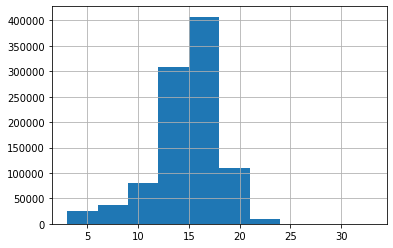

In [69]:
getHist(1)

In [70]:
len(dataFiles)

29